In [1]:
from sklearn.mixture import GaussianMixture
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import glob

In [6]:
#preprocessing :
list_image = []
path_train = glob.glob("./DataToLearn/*.jpg")
for path_img in path_train:
    # read image 
    img = plt.imread(path_img)  
    #resizing
    img = cv.resize(img,(60,40))
    #binarisation
    (thresh, im_bw) = cv.threshold(img, 128, 1, cv.THRESH_BINARY )
    img=np.array(im_bw)
    # Flatten image              
    img=img.flatten()
    list_image.append(img) 
    

In [7]:
#Creation of a GMM model
model_gmm = GaussianMixture(n_components =2,covariance_type='diag',init_params='random')

In [8]:
#Application of learning
model_gmm.fit(list_image)

GaussianMixture(covariance_type='diag', init_params='random', n_components=2)

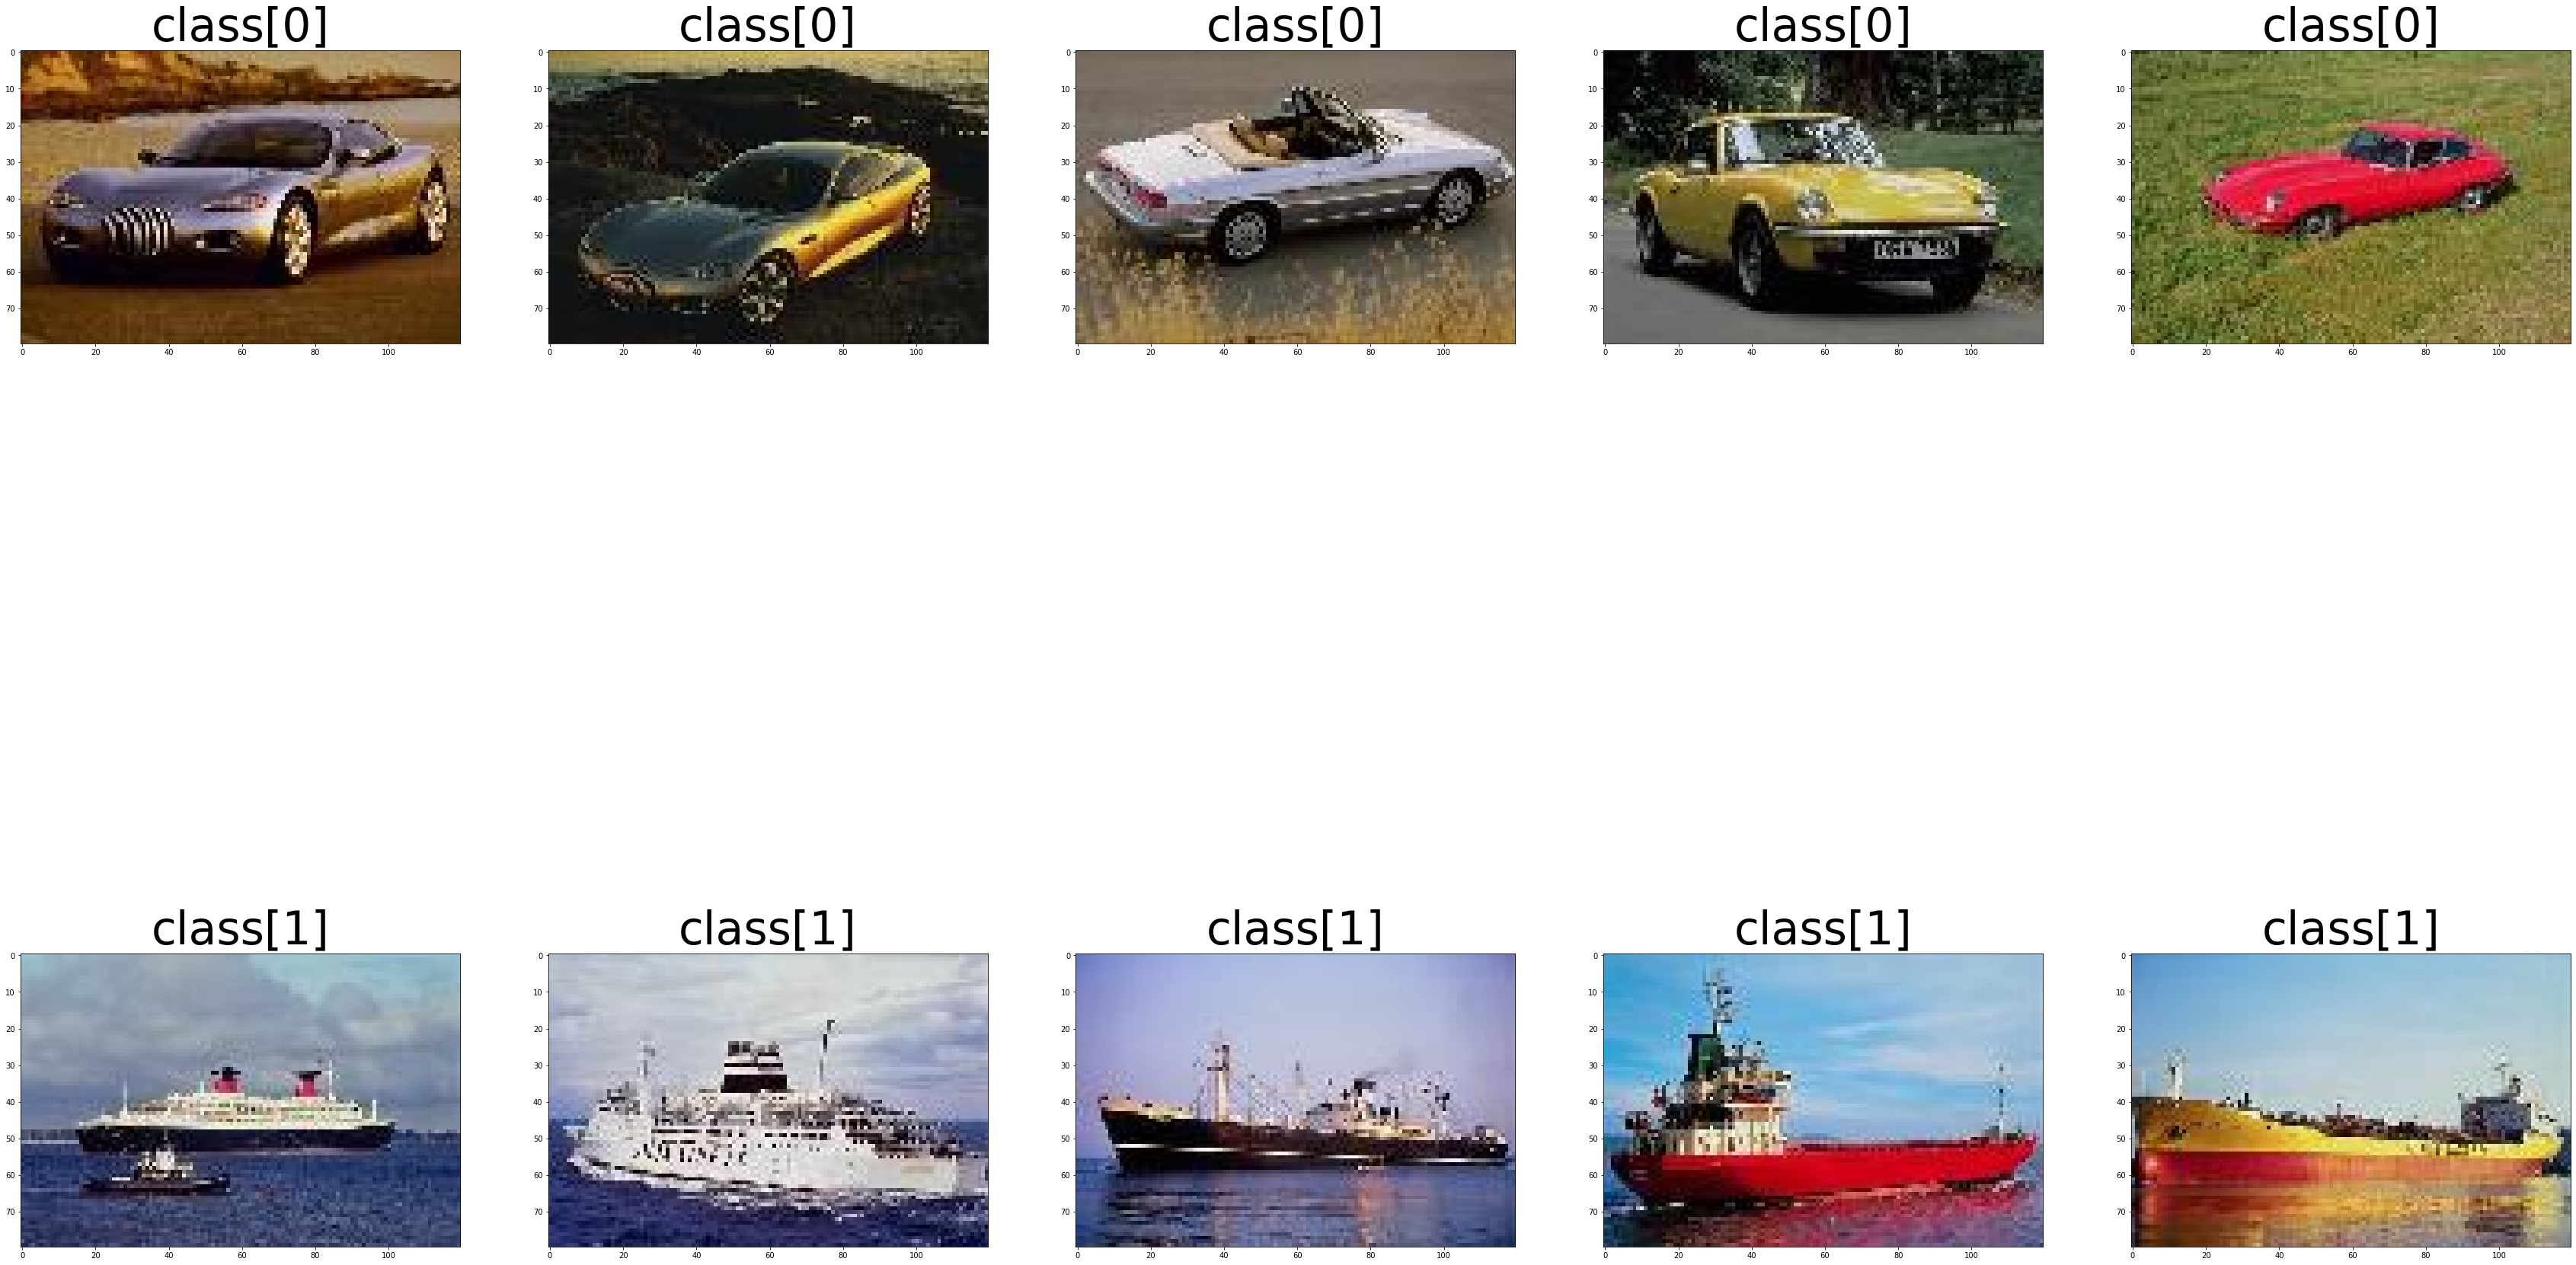

In [9]:
#Classification of test images :

classes = []
k =1
path_test = glob.glob("./DataToPredict/*.jpg")
plt.figure(figsize=(60,40))
for path_img in path_test:
    # read image 
    img = plt.imread(path_img)  
    #resizing
    img = cv.resize(img,(60,40))
    #binarisation
    (thresh, im_bw) = cv.threshold(img, 128, 1, cv.THRESH_BINARY )
    img = np.array(im_bw)
    # Flatten image              
    image = img.flatten().reshape(1,-1)
    if(k<=10):
        img = plt.imread(path_img) 
        plt.subplot(2,5,k)
        plt.imshow(img,cmap='gray')
        class_ = model_gmm.predict(image)
        plt.title("class"+str(class_),fontsize=60)
        classes.append(class_)
    k=k+1
    